In [47]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [48]:
SIGN_LANG_TRAIN_PATH = "./sign_mnist_test.csv"

df = pd.read_csv(SIGN_LANG_TRAIN_PATH)
df.head(2)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,...,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,...,47,104,194,183,186,184,184,184,182,180


In [49]:
HEIGHT, WIDTH = 28, 28

In [50]:
im = np.zeros((HEIGHT, WIDTH))
df.loc(0)[0][1]

149

In [69]:
l = 0
df[df["label"] == l]

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
3,0,203,205,207,206,207,209,210,209,210,...,154,248,247,248,253,236,230,240,253,255
17,0,199,201,203,205,207,208,209,211,211,...,231,232,232,233,231,231,230,230,230,230
21,0,180,177,178,179,179,179,178,177,178,...,195,197,197,195,194,193,192,191,189,187
96,0,179,181,182,184,186,188,188,189,190,...,211,210,210,210,209,209,209,209,209,207
97,0,171,173,176,178,180,182,183,185,185,...,209,210,210,211,209,208,207,207,207,207
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7103,0,172,173,176,178,180,182,183,185,186,...,210,210,210,210,209,208,207,207,207,207
7131,0,154,156,160,162,163,165,166,170,169,...,0,0,0,0,0,0,0,0,0,0
7133,0,152,153,155,157,158,163,163,164,165,...,0,77,222,202,205,206,207,207,207,207
7134,0,197,199,199,199,200,201,202,201,202,...,164,227,226,227,231,219,215,222,230,232


In [78]:
alph = "ABCDEFGHIJKLMNOPQRSTUVWXYZ"
idx = 15
im = df.iloc[idx, 1:].values.reshape(28, 28) 
plt.imshow(im, cmap="gray")
label = int(df.iloc[idx][0])
plt.title(f"Label: {label}")

error: OpenCV(4.8.0) /Users/xperience/GHA-OpenCV-Python/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:3940: error: (-215:Assertion failed) func != 0 in function 'resize'


In [53]:
ann = df["label"]
ann.iloc[2]

10

In [54]:
data = df.drop("label", axis=1)
type(data)

pandas.core.frame.DataFrame

In [55]:
optdf = pd.read_csv(SIGN_LANG_TRAIN_PATH)

In [56]:
labels = np.sort(optdf["label"].unique())
alph_cv_read = "ABCDEFGHIKLMNOPQRSTUVWXY"
alph_cv_read = [c for c in alph_cv_read]
label_c = {l: 0 for l  in labels}

for l in labels:
    label_c[l] = len(optdf[optdf["label"] == l])

print(label_c)

{0: 331, 1: 432, 2: 310, 3: 245, 4: 498, 5: 247, 6: 348, 7: 436, 8: 288, 10: 331, 11: 209, 12: 394, 13: 291, 14: 246, 15: 347, 16: 164, 17: 144, 18: 246, 19: 248, 20: 266, 21: 346, 22: 206, 23: 267, 24: 332}


<BarContainer object of 24 artists>

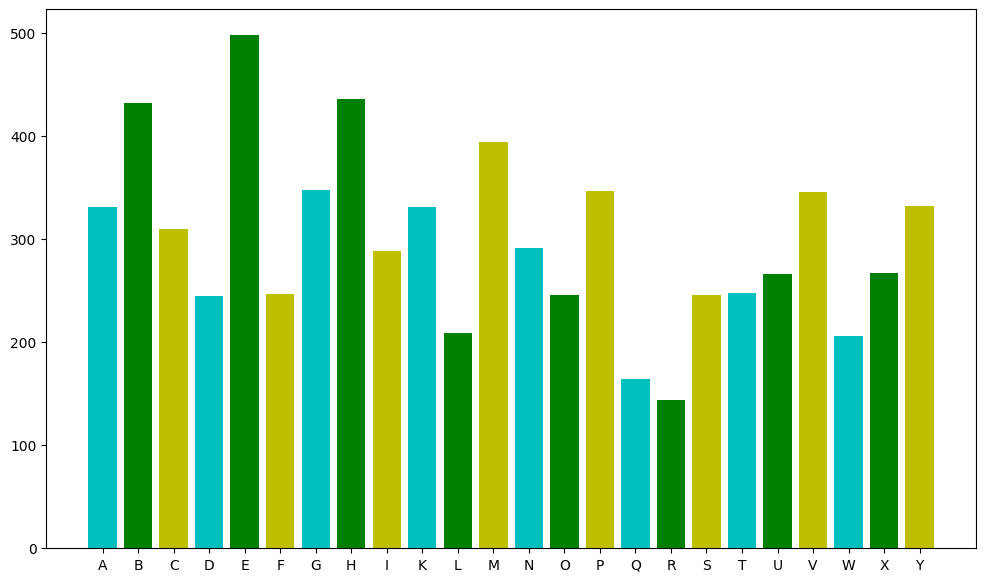

In [57]:
plt.figure(figsize=(12, 7))
plt.bar(range(len(alph_cv_read)), list(label_c.values()), tick_label=alph_cv_read, color=["c", "g", "y"])